In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

# Import the libraries

import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# Importing of data

In [503]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 # Content of Data
 *   Variables that describing attributes related directly to the client:
1. age
1. job : type of job (e.g. 'admin', 'technician', 'unemployed', etc)
2. marital: marital status ('married', 'single', 'divorced', 'unknown')
3. education: level of education ('basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown','university.degree','illiterate')
4. default: if the client has credit in default ('no', 'unknown', 'yes')
5. housing: if the client has housing a loan ('no', 'unknown', 'yes')
6. loan: if the client has a personal loan ? ('no', 'unknown', 'yes')

 * Variables related to the last contact of the current campaign:

1. contact: type of communication ('telephone', 'cellular')
1. month: month of last contact
1. dayofweek: day of last contact
1. duration: call duration (in seconds)

 * Other variables related to the campaign(s):
1. campaign: number of contacts performed during this campaign and for this client
1. pdays: number of days passed by after the client was last contacted from a previous campaign
1. previous: number of contacts performed before this campaign and for this client
1. poutcome: outcome of previous marketing campaign ('nonexistent', 'failure', 'success')

* Socioeconomic variables:
1.  emp_var_rate: employment variation rate - quarterly indicator
1. cons_price_idx: consumer price index - monthly indicator
1. cons_conf_idx: consumer confidence index - monthly indicator
1. euribor3m: euribor 3 month rate - daily indicator
1. nr_employed: number of employees - quarterly indicator

In [504]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     12357 non-null  object 
 1   age             12357 non-null  int64  
 2   job             12357 non-null  object 
 3   marital         12357 non-null  object 
 4   education       12357 non-null  object 
 5   default         12357 non-null  object 
 6   housing         12357 non-null  object 
 7   loan            12357 non-null  object 
 8   contact         12357 non-null  object 
 9   month           12357 non-null  object 
 10  day_of_week     12357 non-null  object 
 11  duration        12357 non-null  float64
 12  campaign        12357 non-null  int64  
 13  pdays           12357 non-null  int64  
 14  previous        12357 non-null  int64  
 15  poutcome        12357 non-null  object 
 16  emp_var_rate    12357 non-null  float64
 17  cons_price_idx  12357 non-null 

In [505]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [506]:
train.iloc[:, 0:10].head(4)

,customer_id,age,job,marital,education,default,housing,loan,contact,month
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may


In [507]:
train.iloc[:, 10:].head(4)

,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,mon,1.283333,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,fri,0.200000,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,thu,4.616667,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,thu,1.166667,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0


# Exploratory Data Analysis:


In [508]:
print('Percentage of Yes', len(train[train['subscribed']==1]) /len(train) *100)
print('Percentage of No', len(train[train['subscribed']==0]) /len(train)*100)

train['subscribed'].value_counts()

Percentage of Yes 11.276057021955534
Percentage of No 88.72394297804446


0    25580
1     3251
Name: subscribed, dtype: int64

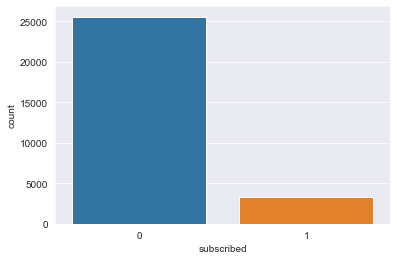

In [509]:
sns.set_style('darkgrid')
sns.countplot(train.subscribed)


# The data set is highly imbalance
The number of negative class is close to 8 times the number of positive class

# Analysis of Categorical variables:

In [510]:
train['job'].value_counts()

admin.           7338
blue-collar      6500
technician       4656
services         2809
management       2014
retired          1180
self-employed    1016
entrepreneur      988
housemaid         754
unemployed        702
student           638
unknown           236
Name: job, dtype: int64

In [511]:
train['marital'].value_counts()

married     17368
single       8189
divorced     3222
unknown        52
Name: marital, dtype: int64

In [512]:
train['education'].value_counts()

university.degree      8530
high.school            6718
basic.9y               4167
professional.course    3648
basic.4y               2914
basic.6y               1607
unknown                1236
illiterate               11
Name: education, dtype: int64

In [513]:
#plt.figure(figsize=(12,22))

#ax= sns.catplot(x="job", hue="subscribed", kind="count", palette="pastel", edgecolor=".6",data=train , height =7, aspect=2 )
#plt.show()


#  Count Function for plotting catogorical data

In [514]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

   
    plt.show()
    
def countplot_hue(label, dataset):
    plt.figure(figsize=(15,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue='subscribed')
    for p in ax.patches:
        
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    
    plt.show()

# Job category

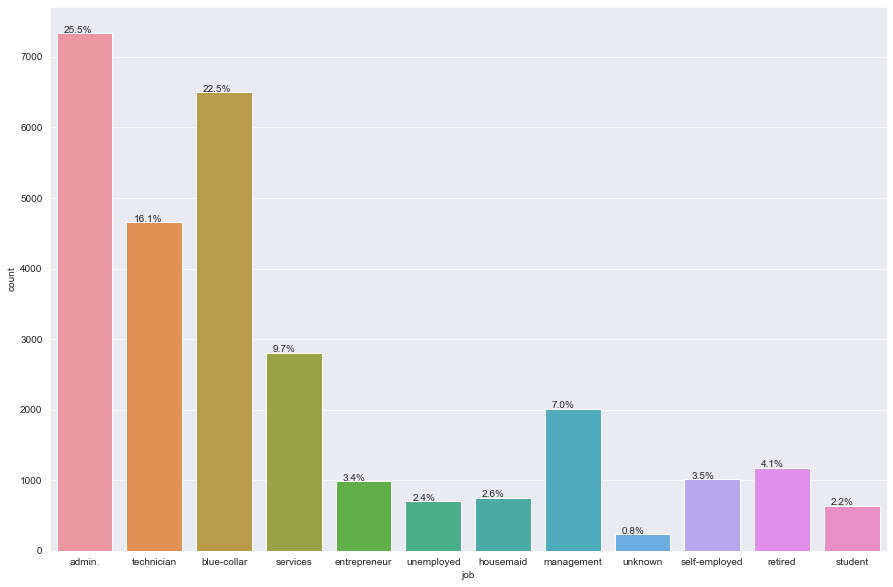

In [515]:
countplot('job', train)

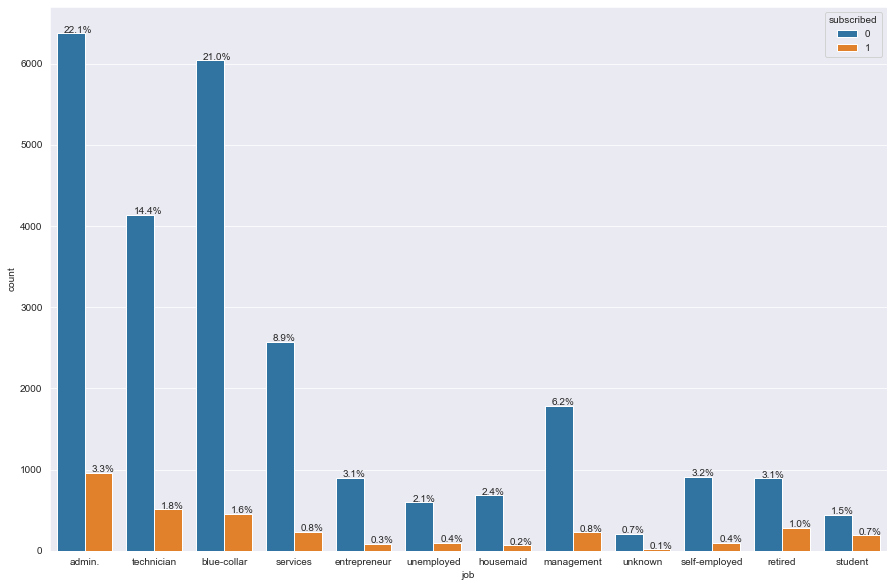

In [516]:
countplot_hue('job', train)

From observation of the Job category *Admin* are the highest customer and also has the highest subscribers and non-subscribers too...

# Marital Category

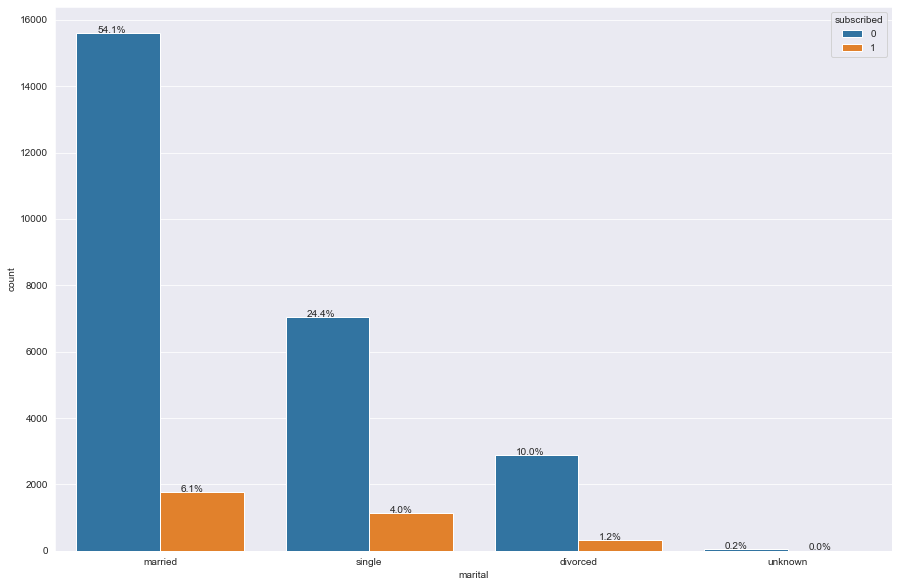

In [517]:
countplot_hue('marital', train)

Most customers are married, followed by singles too

# Education

customers with university degree are more here

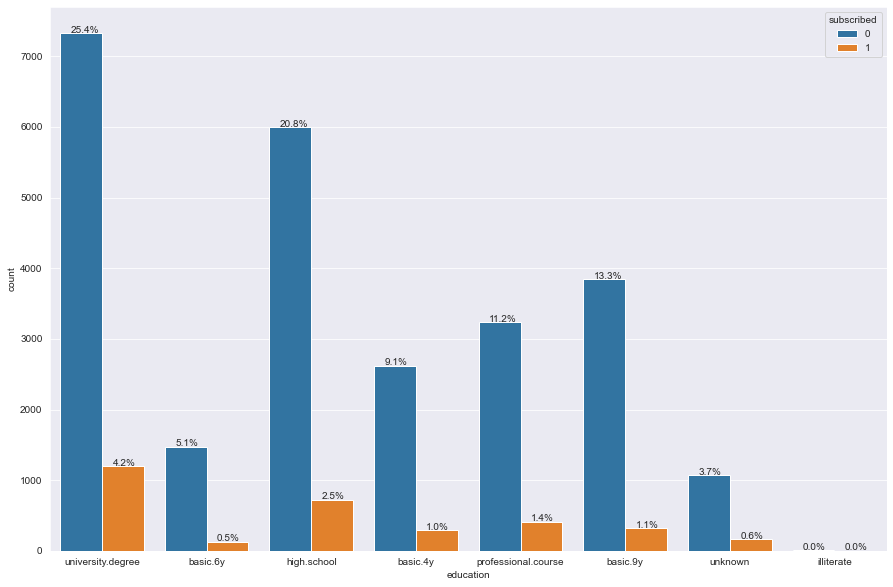

In [518]:
countplot_hue('education', train)

# Default

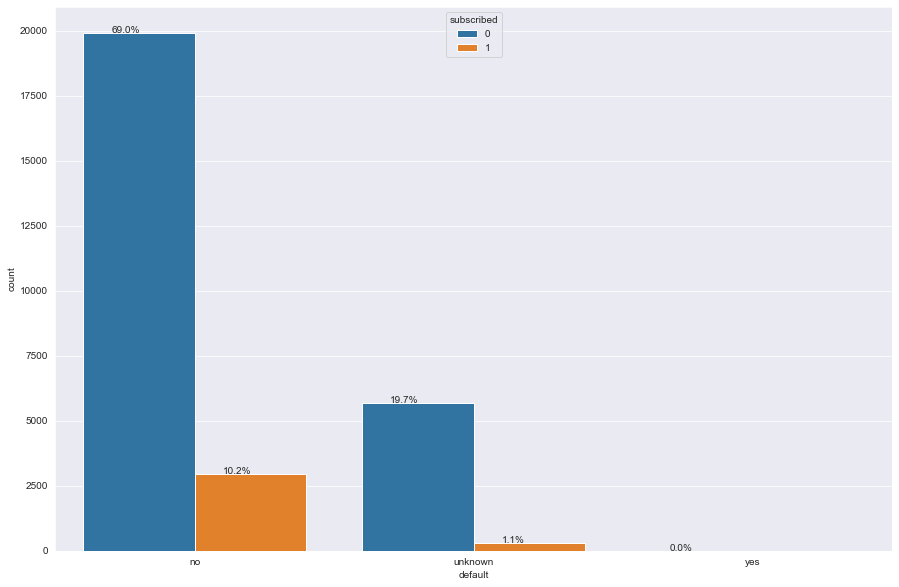

In [519]:
countplot_hue('default', train)

# Housing

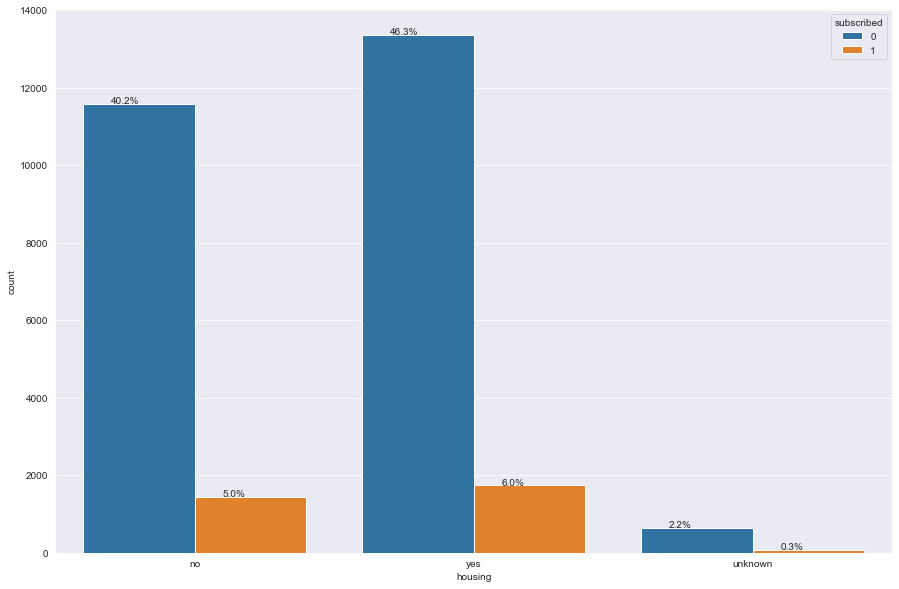

In [520]:
countplot_hue('housing', train)

# Loan
majority of the customers don;t have personal loan

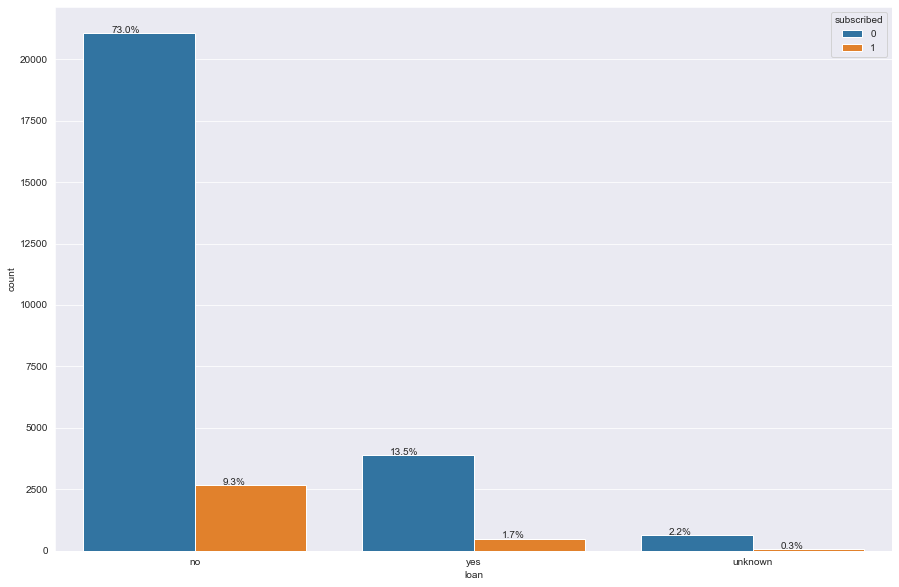

In [521]:
countplot_hue('loan', train)

# contact

type of communication ('telephone', 'cellular')
The communication mode may also have effect on the subscribers choice too

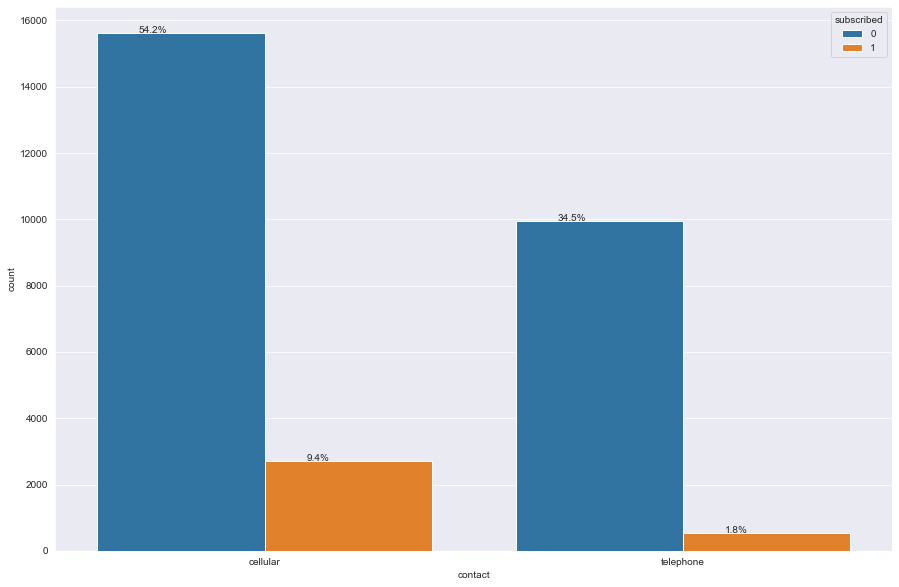

In [522]:
countplot_hue('contact', train)

# Month, :  month of last contact
The month of may has highest and december has lowest.. the month might has some effects too

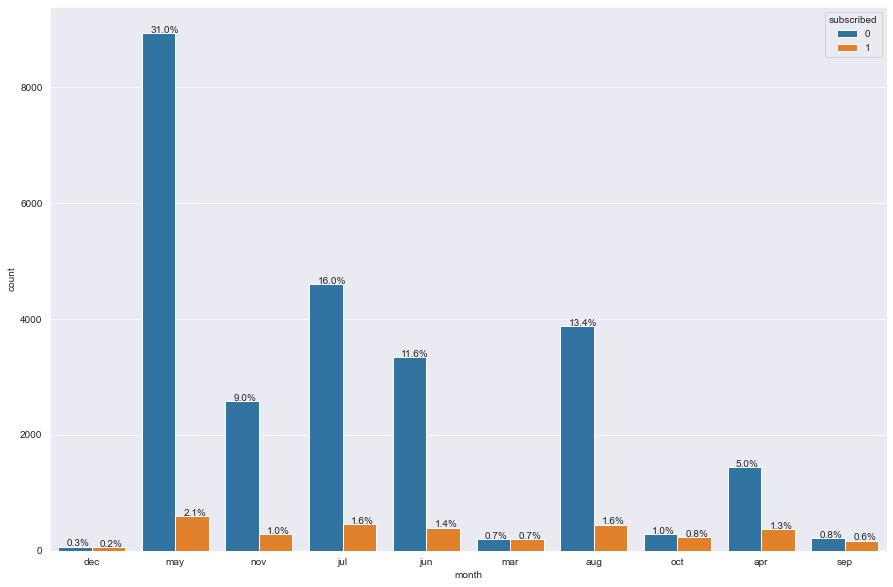

In [523]:
countplot_hue('month', train)

# Days of the week

It seems like the day has less effect on the subscribers choice... we might * Drop it

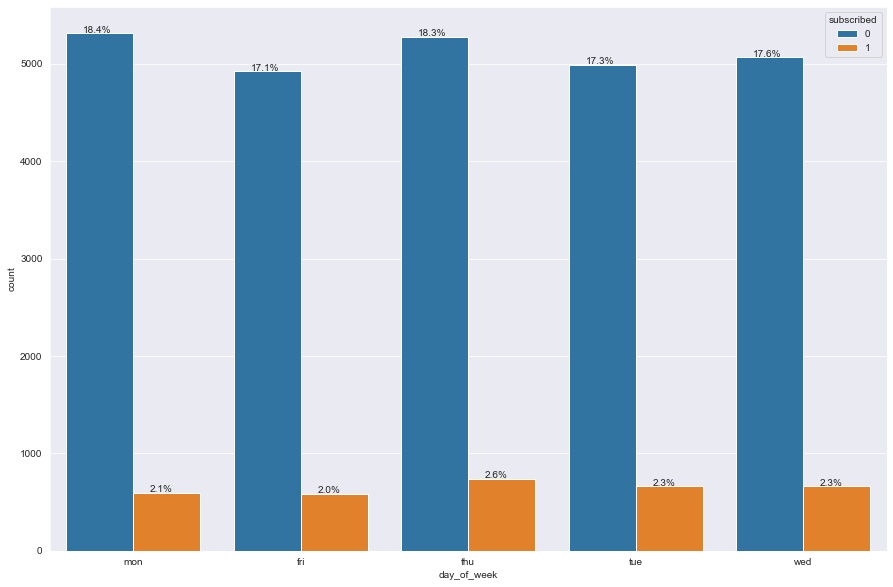

In [524]:
countplot_hue('day_of_week', train)

# poutcome: outcome of previous marketing campaign ('nonexistent', 'failure', 'success')

From observation, the **Non existent group** has much effect on subscribers followed by the **Success previous out come**


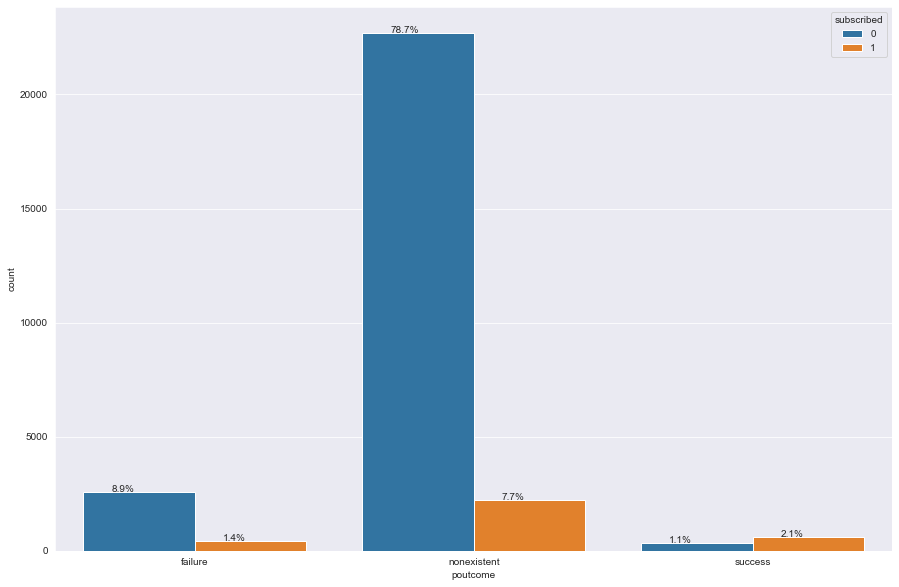

In [525]:
countplot_hue('poutcome', train)

# Analysis of the Numerical data

In [526]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


# Age
The age doesn't have much impact on the choices of subscribers

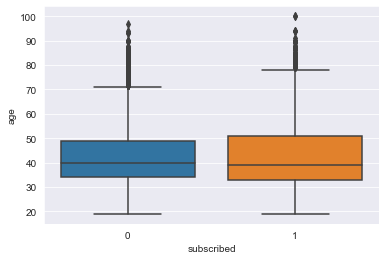

In [527]:
sns.boxplot(data=train, y='age', x='subscribed')

# Durations

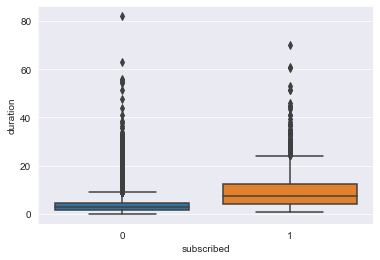

In [528]:
sns.boxplot(data=train, y='duration', x='subscribed')

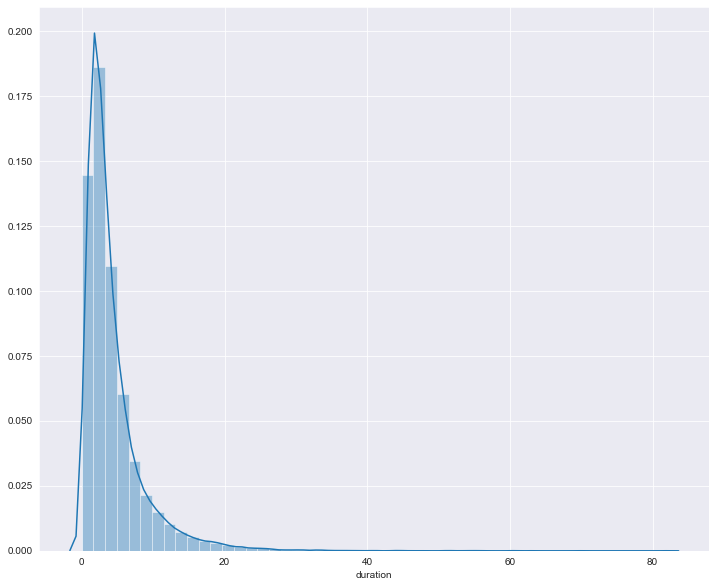

In [529]:
plt.figure(figsize=(12, 10))
sns.distplot(train.duration)

The duration is rightly skewed and it tends to have more effects on the the choice of subscribers

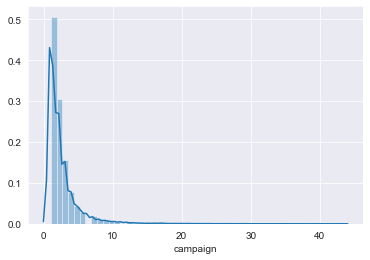

In [530]:
train['campaign'].value_counts()
sns.distplot(train.campaign)

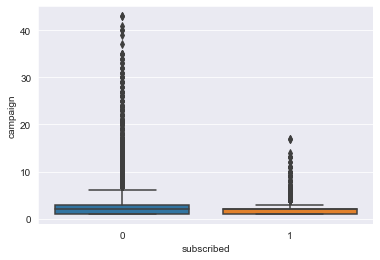

In [42]:
sns.boxplot(data=train, y='campaign', x='subscribed')

# previous: 
number of contacts performed before this campaign and for this client


In [43]:
#countplot_hue('previous', train)

# emp_var_rate: 
employment variation rate - quarterly indicator


In [44]:
train.emp_var_rate.value_counts()

 1.43    11440
-1.77     6403
 1.13     5355
-0.07     2582
-2.87     1141
-3.37      759
-1.67      562
-1.07      454
-2.97      126
-0.17        9
Name: emp_var_rate, dtype: int64

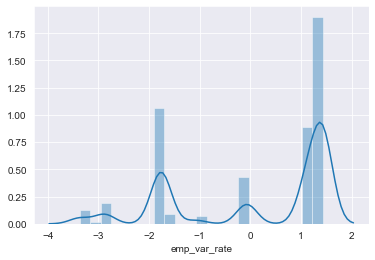

In [45]:
sns.distplot(train['emp_var_rate'])

# cons_price_idx: 
consumer price index - monthly indicator
This will definitely affect the choice.. from the median displayed below

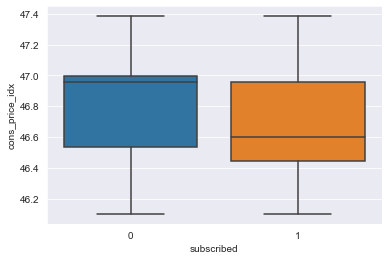

In [46]:
sns.boxplot(data=train, y='cons_price_idx', x='subscribed')

# euribor3m:
euribor 3 month rate - daily indicator


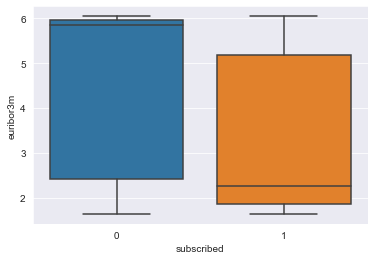

In [47]:
sns.boxplot(data=train, y='euribor3m', x='subscribed')

# Correlated Data
**Correlation** is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

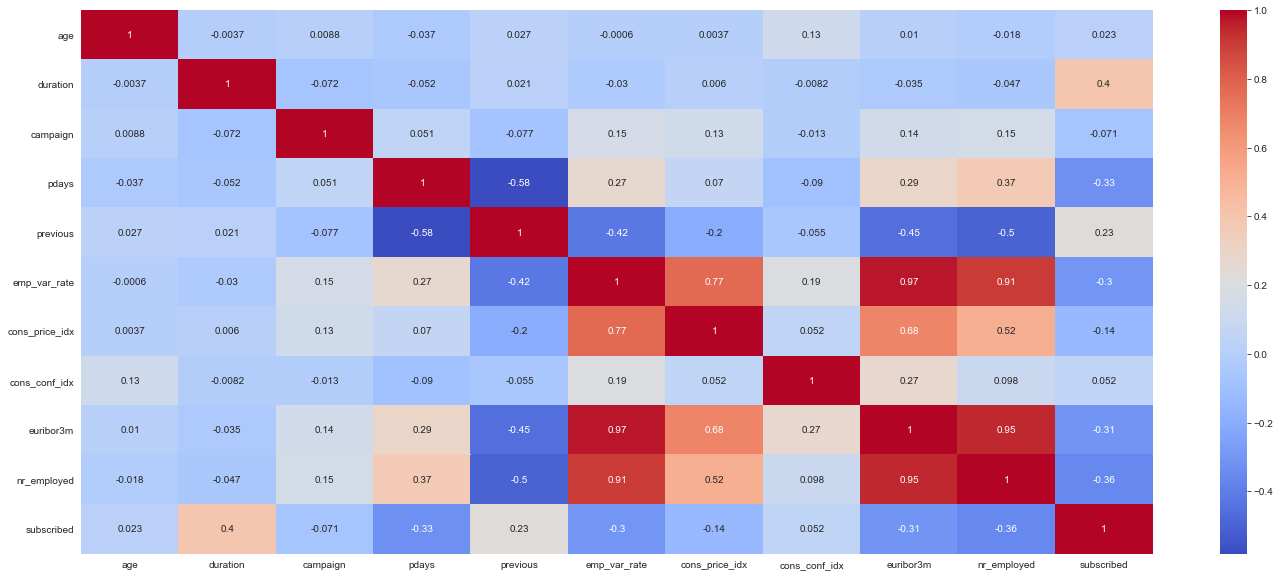

In [48]:
plt.figure(figsize = (24,10))
sns.heatmap(train.corr(), annot = True, cmap='coolwarm')

From the heatmap above some columns are highly corrolated. And it is sufficient to drop those correlated columns, **emp_var_rate and cons_price_idx, euribor3m**, nr_employed and emp_var_rate

In [49]:
train.iloc[:,0:15
          ].head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,mon,1.283333,3,999,1
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,fri,0.200000,4,999,0


In [50]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


# Dropping some values

In [107]:
train2 = train.drop(['customer_id', 'age', 'day_of_week', 'emp_var_rate', 'nr_employed'], axis=1)
test2 = test.drop([ 'age', 'day_of_week', 'emp_var_rate', 'nr_employed'], axis=1)


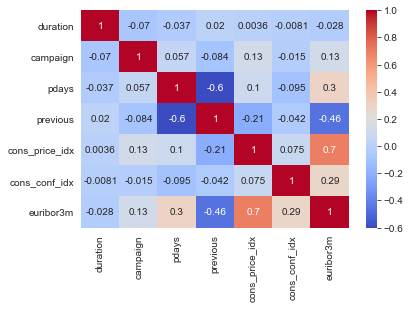

In [110]:
sns.heatmap(test2.corr(), annot = True, cmap='coolwarm')


Our data is now free highly correlated data

# Data preprocessing 
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors.

At this point we need to convert our categorical data to numerical and other data cleanings

* There are no missing values
* let's check for duplicate values too


In [442]:
train2.isnull().sum() # No missing values

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
subscribed        0
dtype: int64

# Dublicate values

In [531]:
duprows = train2[train2.duplicated(keep ='last')]
duprows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 844 to 20052
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             38 non-null     object 
 1   marital         38 non-null     object 
 2   education       38 non-null     object 
 3   default         38 non-null     object 
 4   housing         38 non-null     object 
 5   loan            38 non-null     object 
 6   contact         38 non-null     object 
 7   month           38 non-null     object 
 8   duration        38 non-null     float64
 9   campaign        38 non-null     int64  
 10  pdays           38 non-null     int64  
 11  previous        38 non-null     int64  
 12  poutcome        38 non-null     object 
 13  cons_price_idx  38 non-null     float64
 14  cons_conf_idx   38 non-null     float64
 15  euribor3m       38 non-null     float64
 16  subscribed      38 non-null     int64  
dtypes: float64(4), int64(4), object(

In [532]:
duprows.shape

(38, 17)

 We need to drop the duplicates
 
 Pandas drop_duplicates() method helps in removing duplicates from the data frame. Parameters: subset: Subset takes a column or list of column label. It's default value is none.

In [533]:
train2.shape

(28831, 17)

In [535]:
train3 = train2.drop_duplicates()
test3 = test2.drop_duplicates()
train3.shape

(28793, 17)

# Encoding the categorical data : One hot encoding

In [536]:
# filtering the categorical data

categorical_cols = train3.columns[train3.dtypes==object].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [537]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28793 entries, 0 to 28830
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             28793 non-null  object 
 1   marital         28793 non-null  object 
 2   education       28793 non-null  object 
 3   default         28793 non-null  object 
 4   housing         28793 non-null  object 
 5   loan            28793 non-null  object 
 6   contact         28793 non-null  object 
 7   month           28793 non-null  object 
 8   duration        28793 non-null  float64
 9   campaign        28793 non-null  int64  
 10  pdays           28793 non-null  int64  
 11  previous        28793 non-null  int64  
 12  poutcome        28793 non-null  object 
 13  cons_price_idx  28793 non-null  float64
 14  cons_conf_idx   28793 non-null  float64
 15  euribor3m       28793 non-null  float64
 16  subscribed      28793 non-null  int64  
dtypes: float64(4), int64(4), object

In [538]:
train3.poutcome.value_counts()

nonexistent    24869
failure         2984
success          940
Name: poutcome, dtype: int64

In [542]:
#train
dummies = pd.get_dummies(train3[categorical_cols])
dummies
train4 = train3.drop(categorical_cols, axis =1)
train_merged = pd.concat([train4, dummies], axis='columns')
train_merged.head()

#test
dummies2 = pd.get_dummies(test3[categorical_cols])
dummies2
test4 = test3.drop(categorical_cols, axis =1)
test_merged = pd.concat([test4, dummies2], axis='columns')
test_merged.head()



,customer_id,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,euribor3m,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,customer_id_32884,6.183333,1,999,1,46.4465,-32.34,2.301,0,0,...,0,0,0,1,0,0,0,1,0,0
1,customer_id_3169,4.750000,2,999,0,46.9970,-25.48,5.862,0,0,...,0,0,0,1,0,0,0,0,1,0
2,customer_id_32206,0.866667,1,999,1,46.4465,-32.34,2.315,0,1,...,0,0,0,1,0,0,0,1,0,0
3,customer_id_9403,5.916667,4,999,0,47.2325,-29.26,5.969,1,0,...,0,1,0,0,0,0,0,0,1,0
4,customer_id_14020,3.150000,2,999,0,46.9590,-29.89,5.965,0,0,...,1,0,0,0,0,0,0,0,1,0


In [543]:
test_merged.isnull().sum()

customer_id                      0
duration                         0
campaign                         0
pdays                            0
previous                         0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

In [581]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.shape

(51084, 56)

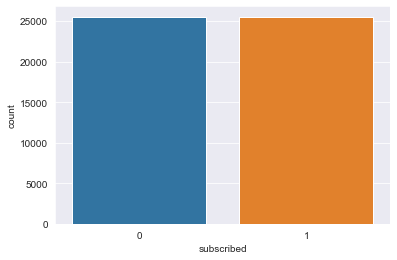

In [582]:
sns.countplot(train_merged['subscribed'])

# Slit data

In [583]:
train_merged = oversampled_train
X = train_merged.drop(['subscribed'], axis=1).values
y = train_merged['subscribed']
test5 = test_merged.drop(['customer_id'], axis=1)
test_final = test5.values


In [584]:
X

array([[1.28333333e+00, 3.00000000e+00, 9.99000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e-01, 4.00000000e+00, 9.99000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.61666667e+00, 2.00000000e+00, 9.99000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.52373800e+01, 1.00000000e+00, 9.99000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.36257243e+00, 6.00000000e+00, 9.99000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.94056287e+00, 1.00000000e+00, 9.99000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# PCA transformation to balance the data, Principal Component Analysis

# SMOTE Technique (Over-Sampling):
SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

# Understanding SMOTE:

* Solving the Class Imbalance: 
SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
* Location of the synthetic points: 
SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
* Final Effect:
More information is retained since we didn't have to delete any rows unlike in random undersampling.
* Accuracy || Time Tradeoff:
Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [547]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X = train_merged.drop(['subscribed'], axis=1).values
y = train_merged['subscribed']
test5 = test_merged.drop(['customer_id'], axis=1)
test_final = test5.values
len(test_merged), len(test_final)

(12357, 12357)

# Using smote

In [548]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 3251
Before OverSampling, counts of label '0': 25542 

After OverSampling, the shape of train_X: (51084, 55)
After OverSampling, the shape of train_y: (51084,) 

After OverSampling, counts of label '1': 25542
After OverSampling, counts of label '0': 25542


In [550]:
train4.corr()

,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,euribor3m,subscribed
duration,1.000000,-0.072656,-0.051964,0.020504,0.006262,-0.008065,-0.034826,0.399060
campaign,-0.072656,1.000000,0.050709,-0.077412,0.129088,-0.013079,0.138539,-0.070987
pdays,-0.051964,0.050709,1.000000,-0.581890,0.069737,-0.089780,0.294944,-0.326429
previous,0.020504,-0.077412,-0.581890,1.000000,-0.199266,-0.054585,-0.452411,0.226564
cons_price_idx,0.006262,0.129088,0.069737,-0.199266,1.000000,0.051851,0.684424,-0.135380
cons_conf_idx,-0.008065,-0.013079,-0.089780,-0.054585,0.051851,1.000000,0.273418,0.052143
euribor3m,-0.034826,0.138539,0.294944,-0.452411,0.684424,0.273418,1.000000,-0.309137
subscribed,0.399060,-0.070987,-0.326429,0.226564,-0.135380,0.052143,-0.309137,1.000000


In [585]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35758, 55)
Number transactions y_train dataset:  (35758,)
Number transactions X_test dataset:  (15326, 55)
Number transactions y_test dataset:  (15326,)


In [586]:
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)
#test_final2=scaler.transform(test_final)
# convert to 1-D

y_train2 = np.array(y_train).reshape((-1, ))
y_test2 = np.array(y_test).reshape((-1, ))

In [587]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(class_weight='balanced')
model2.fit(x_train2, y_train2)
model2.score(x_test2, y_test2)

0.9414720083518204

# Light gbm highest

In [588]:
from lightgbm import LGBMClassifier
model5 = LGBMClassifier()
#model5 = CalibratedClassifierCV(model5, method="sigmoid")

#model3 = RandomForestClassifier(n_estimators=90,n_jobs=1)
#model2 = LogisticRegression()
model5.fit(x_train2, y_train2)

model5.score(x_test2, y_test2)

0.9488450998303537

# Nueral network

In [589]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,LSTM

print('import succeful')

import succeful


In [590]:
model3 = Sequential()

model3.add(Dense(90, activation='relu'))
#model3.add(Dropout(0.5))

model3.add(Dense(40, activation='relu'))
#model3.add(Dropout(0.5))

model3.add(Dense(35, activation='relu'))
#model3.add(Dropout(0.5))

model3.add(Dense(30, activation='relu'))
#model3.add(Dropout(0.5))

model3.add(Dense(25, activation='relu'))
#model3.add(Dropout(0.5))

model3.add(Dense(15, activation='relu'))
#model3.add(Dropout(0.5))


#binary classification
model3.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay = 0.00005)

model3.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [591]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop =  EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [609]:
model3.fit(x=x_train2, y=y_train2, validation_data=(x_test2, y_test2),
         batch_size=150, epochs=100 ,callbacks=[early_stop])

Train on 35758 samples, validate on 15326 samples
Epoch 1/100
35758/35758 [==============================] - 1s 31us/sample - loss: 0.0087 - accuracy: 0.9961 - val_loss: 0.5963 - val_accuracy: 0.9389
Epoch 2/100
35758/35758 [==============================] - 1s 30us/sample - loss: 0.0086 - accuracy: 0.9958 - val_loss: 0.6068 - val_accuracy: 0.9372
Epoch 3/100
35758/35758 [==============================] - 1s 31us/sample - loss: 0.0088 - accuracy: 0.9960 - val_loss: 0.5908 - val_accuracy: 0.9375
Epoch 4/100
35758/35758 [==============================] - 1s 27us/sample - loss: 0.0078 - accuracy: 0.9963 - val_loss: 0.5907 - val_accuracy: 0.9384
Epoch 5/100
35758/35758 [==============================] - 1s 26us/sample - loss: 0.0086 - accuracy: 0.9959 - val_loss: 0.5968 - val_accuracy: 0.9381
Epoch 6/100
35758/35758 [==============================] - 1s 27us/sample - loss: 0.0083 - accuracy: 0.9957 - val_loss: 0.5968 - val_accuracy: 0.9378
Epoch 7/100
35758/35758 [=========================

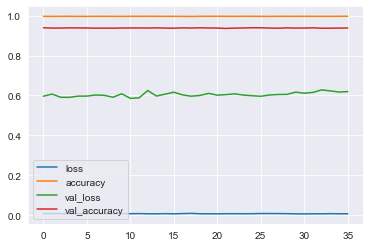

In [610]:
losses3 = pd.DataFrame(model3.history.history)
losses3.plot()

In [611]:
pred3 = model3.predict_classes(x_test2)

In [607]:
from sklearn.metrics import classification_report, confusion_matrix

In [608]:
print(classification_report(y_test2, pred3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7657
           1       0.93      0.94      0.94      7669

    accuracy                           0.94     15326
   macro avg       0.94      0.94      0.94     15326
weighted avg       0.94      0.94      0.94     15326



In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
pca = PCA(n_components=2)
x_scaler = scaler.fit_transform(X)
x_scaler
principalComponents = pca.fit_transform(x_scaler)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [77]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,subscribed
0,4.408764,0.940051,0.0
1,0.039866,-0.700349,0.0
2,-3.003429,2.715963,0.0
3,3.400394,1.710685,0.0
4,1.203119,-1.100442,0.0


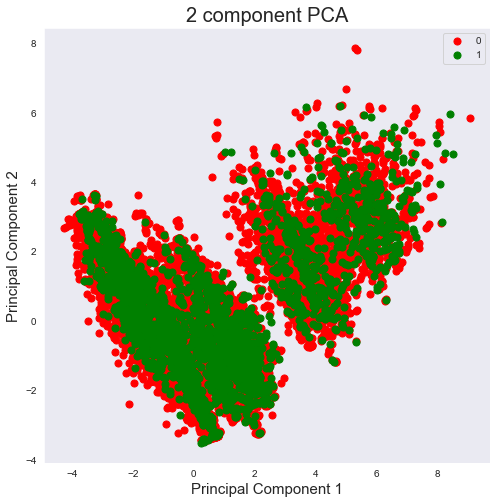

In [78]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['subscribed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [84]:
len(train4[train4['subscribed']==1])

3251

In [303]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle =True,random_state=2   )

In [357]:
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)
#test_final2=scaler.transform(test_final)
# convert to 1-D

y_train2 = np.array(y_train).reshape((-1, ))
y_test2 = np.array(y_test).reshape((-1, ))

In [358]:
y_train2

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [359]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(class_weight='balanced')
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8695680542868328

In [360]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier()
#model3 = RandomForestClassifier(n_estimators=90,n_jobs=1)
#model2 = LogisticRegression()
model4.fit(x_train2, y_train2)

model4.score(x_test2, y_test2)


0.9521727782852669

# Logistic regression

In [252]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced',C =1, penalty ='none')
model.fit(x_train2, y_train2)
y_pred = model.predict_proba(x_test2)

print("AUC score with duration column: ", roc_auc_score(y_test2, y_pred[:,1]))

AUC score with duration column:  0.9359298906112569


# Random forest

#  XGBoost with RandomizedSearchCV hyper parameter tuning

# light LGBM

In [234]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier()
#model3 = RandomForestClassifier(n_estimators=90,n_jobs=1)
#model2 = LogisticRegression()
model4.fit(x_train2, y_train2)
model4.score(x_train2, y_train2)


0.9393505253104107

In [96]:
train.head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


# Grid search

In [198]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Predicting


In [577]:
test_pred = model2.predict(test_final)

test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [599]:
#nural network
test_pred = model3.predict_classes(test_final)

submission_df = {'customer_id': test_merged['customer_id'],
                 'subscribed': test_pred.tolist()}
    

submission_df = pd.DataFrame(submission_df)
#Removing the bracket

submission_df['subscribed'] = submission_df['subscribed'].str[0]
submission_df

#submission1
submission_df.to_csv('submissionl_8f.csv', index=False)
pd.read_csv('submissionl_8f.csv').head(12)

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0
5,customer_id_17201,0
6,customer_id_879,0
7,customer_id_23757,0
8,customer_id_10821,0
9,customer_id_14355,0


In [579]:
submission_df = {'customer_id': test_merged['customer_id'],
                 'subscribed': test_pred.tolist()}


submission_df = pd.DataFrame(submission_df)
submission_df

#submission1
submission_df.to_csv('submissionl_e1.csv', index=False)
pd.read_csv('submissionl_e1.csv').head(12)

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0
5,customer_id_17201,0
6,customer_id_879,0
7,customer_id_23757,0
8,customer_id_10821,0
9,customer_id_14355,0
